<h1><font color="green">Aam Aadmi Party Machine Learning Internship</font></h1>

<h1><font color="red">My Details:- </font></h1>
<h2><font color="blue">Name: </font>VIJAY KUMAR BODA</h2>
<h2><font color="blue">Email: </font>vijaykumar.b15@iiits.in</h2>
<h2><font color="blue">Phone: </font>6302618836 </h2>

## Analysis of loan data and predicting the customers who are likely to pay the amount back and who are not.
    1. This includes Exploratory Data Analysis of loan dataset which includes Univariate 
        and Bivariate analysis.
    2.Finally prediction of types of customers Loan accepted or Rejected

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [46]:
df=pd.read_excel('loan.xlsx')
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,0.1065,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,0.1527,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,0.1596,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,0.1349,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,0.1269,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [88]:
df1=df.copy()

In [89]:
df2=df1.copy()

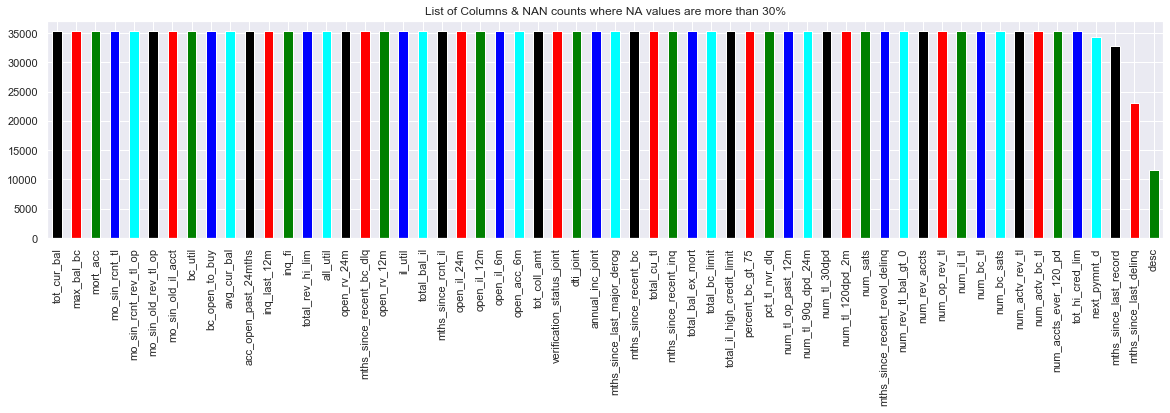

In [90]:
# Missing data

NAN_total=df.isnull().sum().sort_values(ascending=False)
NAN_total = NAN_total[NAN_total.values >(0.1*len(df))]
plt.figure(figsize=(20,4))
NAN_total.plot(kind='bar',color=['black', 'red', 'green', 'blue', 'cyan'])
plt.title('List of Columns & NAN counts where NA values are more than 30%')
plt.show()

miss=pd.DataFrame()
miss['total']=NAN_total

In [91]:
def removeNulls(dataframe, axis =1, percent=0.3):
    '''
    * removeNull function will remove the rows and columns based on parameters provided.
    * dataframe : Name of the dataframe  
    * axis      : axis = 0 defines drop rows, axis =1(default) defines drop columns    
    * percent   : percent of data where column/rows values are null,default is 0.3(30%)
              
    '''
    df = dataframe.copy()
    ishape = df.shape
    if axis == 0:
        rownames = df.transpose().isnull().sum()
        rownames = list(rownames[rownames.values > percent*len(df)].index)
        df.drop(df.index[rownames],inplace=True) 
        print("\nNumber of Rows dropped\t: ",len(rownames))
    else:
        colnames = (df.isnull().sum()/len(df))
        colnames = list(colnames[colnames.values>=percent].index)
        df.drop(labels = colnames,axis =1,inplace=True)        
        print("Number of Columns dropped\t: ",len(colnames))
        
    print("\nOld dataset rows,columns",ishape,"\nNew dataset rows,columns",df.shape)

    return df

1. Remove columns where NA values are more than or equal to 30%

In [92]:
df = removeNulls(df, axis =1,percent = 0.3)

Number of Columns dropped	:  58

Old dataset rows,columns (35332, 118) 
New dataset rows,columns (35332, 60)


2. Remove rows where NA values are more than or equal to 30%¶

In [93]:
df = removeNulls(df, axis =0,percent = 0.3)


Number of Rows dropped	:  0

Old dataset rows,columns (35332, 60) 
New dataset rows,columns (35332, 60)


3. Remove columns where number of unique value is only 1.

In [94]:
unique = df.nunique()
unique = unique[unique.values == 1]

In [95]:
df.drop(labels = list(unique.index), axis =1, inplace=True)
print("So now we are left with",df.shape ,"rows & columns.")

So now we are left with (35332, 49) rows & columns.


4. Remove irrelevant columns.
Till now we have removed the columns based on the count & statistics. Now let's look at each column from business perspective if that is required or not for our analysis such as Unique ID's, URL. As last 2 digits of zip code is masked 'xx', we can remove that as well.

In [96]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies', 'loan_income_ratio', 'issue_month',
       'issue_year', 'loan_amnt_range', 'annual_inc_range'],
      dtype='object')

In [97]:
not_required_columns = ["id","member_id","url","zip_code"]
df.drop(labels = not_required_columns, axis =1, inplace=True)
print("So now we are left with",df.shape ,"rows & columns.")

So now we are left with (35332, 45) rows & columns.


6. Cast all continuos variables to numeric¶


In [98]:
numeric_columns = ['loan_amnt','funded_amnt','funded_amnt_inv','installment','int_rate','annual_inc','dti']

df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric)

In [99]:
df.tail(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,loan_income_ratio,issue_month,issue_year,loan_amnt_range,annual_inc_range
39711,5000,5000,700.0,36 months,0.0870,158.30,B,B1,"A. F. Wolfers, Inc.",5 years,...,0.0,2010-07-01,159.83,2014-11-01,NaN,0.066667,07,2007,0-5000,50000-75000
39712,2500,2500,1075.0,36 months,0.0807,78.42,A,A4,FiSite Research,4 years,...,0.0,2010-07-01,80.90,2010-06-01,NaN,0.022727,07,2007,0-5000,100000 and above
39713,8500,8500,875.0,36 months,0.1028,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,...,0.0,2010-07-01,281.94,2010-07-01,NaN,0.472222,07,2007,5000-10000,0-25000
39714,5000,5000,1325.0,36 months,0.0807,156.84,A,A4,NaN,< 1 year,...,0.0,2008-04-01,0.00,2007-06-01,NaN,0.050000,07,2007,0-5000,75000-100000
39716,7500,7500,800.0,36 months,0.1375,255.43,E,E2,Evergreen Center,< 1 year,...,0.0,2010-06-01,256.59,2010-06-01,NaN,0.340909,06,2007,5000-10000,0-25000


 Purpose of loan : Drop records where values are less than 0.75%¶

In [100]:
(df.purpose.value_counts()*100)/len(df)

debt_consolidation    52.414242
credit_card           14.431677
home_improvement       8.258802
major_purchase         6.138911
small_business         5.108683
car                    4.372807
wedding                2.654817
medical                1.941583
moving                 1.633080
vacation               1.078343
house                  1.058531
educational            0.908525
Name: purpose, dtype: float64

In [101]:
del_loan_purpose = (df.purpose.value_counts()*100)/len(df)
del_loan_purpose = del_loan_purpose[(del_loan_purpose < 0.75) | (del_loan_purpose.index == 'other')]

df.drop(labels = df[df.purpose.isin(del_loan_purpose.index)].index, inplace=True)
print("So now we are left with",df.shape ,"rows & columns.")

print(df.purpose.unique())

So now we are left with (35332, 45) rows & columns.
['credit_card' 'car' 'small_business' 'wedding' 'debt_consolidation'
 'home_improvement' 'major_purchase' 'medical' 'moving' 'vacation' 'house'
 'educational']


Loan Status : Drop records where values are less than 1.5%

In [102]:
(df.loan_status.value_counts()*100)/len(df)

Fully Paid     83.173893
Charged Off    13.975999
Current         2.850108
Name: loan_status, dtype: float64

In [103]:
del_loan_status = (df.loan_status.value_counts()*100)/len(df)
del_loan_status = del_loan_status[(del_loan_status < 1.5)]
df.drop(labels = df[df.loan_status.isin(del_loan_status.index)].index, inplace=True)
print("So now we are left with",df.shape ,"rows & columns.")

print(df.loan_status.unique())

So now we are left with (35332, 45) rows & columns.
['Fully Paid' 'Charged Off' 'Current']


## We will now derive some new columns based on our business understanding that will be helpful in our analysis.

1. Loan amount to Annual Income ratio

In [104]:
df['loan_income_ratio']= df['loan_amnt']/df['annual_inc']

2. Extract Year & Month from Issue date


In [105]:
df['issue_d']=df['issue_d'].astype(str)

In [106]:
df['issue_year'],df['issue_month'],df['issue_date'] = df['issue_d'].str.split('-').str
df[['issue_date','issue_month','issue_year']].head()

,issue_date,issue_month,issue_year
0,01,12,2011
1,01,12,2011
2,01,12,2011
5,01,12,2011
6,01,12,2011


3. Change order of months from Jan to Dec, currently it's in alphabetical order(A-Z)


In [107]:
months_order = ["01", "02", "03", "04","05","06","07","08","09","10","11","12"]
df['issue_month'] = pd.Categorical(df['issue_month'],categories=months_order, ordered=True)

4. Create Bins for range of Loan Amount

In [108]:
bins = [0, 5000, 10000, 15000, 20000, 25000,40000]
slot = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000 and above']
df['loan_amnt_range'] = pd.cut(df['loan_amnt'], bins, labels=slot)

5. Create Bins for range of Annual Income

In [109]:
bins = [0, 25000, 50000, 75000, 100000,1000000]
slot = ['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000 and above']
df['annual_inc_range'] = pd.cut(df['annual_inc'], bins, labels=slot)


6. Create Bins for range of Interest rates

In [168]:
df['int_rate']=df['int_rate'].apply(lambda x: x*100)

df['int_rate']

0        10.65
1        15.27
2        15.96
5         7.90
6        15.96
7        18.64
8        21.28
10       14.65
11       12.69
12       13.49
13        9.91
15       16.29
16       15.27
17        6.03
18       11.71
19        6.03
20       15.27
21       12.42
22       11.71
23       11.71
24       11.71
25        9.91
26       14.27
28       11.71
29       11.71
30        7.51
31        7.90
32       15.96
33        8.90
34       15.96
         ...  
39685     7.43
39686     9.64
39687    12.49
39688    13.43
39689    11.54
39690    10.59
39691    15.96
39693     9.96
39694     7.43
39695     7.43
39696    10.59
39697    10.28
39698     9.01
39699     8.38
39700     7.75
39701     8.38
39702    11.22
39703    10.28
39704     8.70
39705     7.43
39706     8.07
39707     9.33
39708     9.96
39709    11.22
39710     7.43
39711     8.70
39712     8.07
39713    10.28
39714     8.07
39716    13.75
Name: int_rate, Length: 35152, dtype: float64

In [169]:
bins = [0,0.05, 7.5, 10, 12.5, 15]
slot = ['0-7.5', '7.5-10', '10-12.5', '12.5-15', '15 and above']
df['int_rate_range'] = pd.cut(df['int_rate'], bins, labels=slot)

# Univariate Analysis

In [111]:
def univariate(df,col,vartype,hue =None):
    
    '''
    Univariate function will plot the graphs based on the parameters.
    df      : dataframe name
    col     : Column name
    vartype : variable type : continuos or categorical
                Continuos(0)   : Distribution, Violin & Boxplot will be plotted.
                Categorical(1) : Countplot will be plotted.
    hue     : It's only applicable for categorical analysis.
    
    '''
    sns.set(style="darkgrid")
    
    if vartype == 0:
        fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
        ax[0].set_title("Distribution Plot")
        sns.distplot(df[col],ax=ax[0])
        ax[1].set_title("Violin Plot")
        sns.violinplot(data =df, x=col,ax=ax[1], inner="quartile")
        ax[2].set_title("Box Plot")
        sns.boxplot(data =df, x=col,ax=ax[2],orient='v')
    
    if vartype == 1:
        temp = pd.Series(data = hue)
        fig, ax = plt.subplots()
        width = len(df[col].unique()) + 6 + 4*len(temp.unique())
        fig.set_size_inches(width , 7)
        ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue) 
        if len(temp.unique()) > 0:
            for p in ax.patches:
                ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(df))), (p.get_x()+0.05, p.get_height()+20))  
        else:
            for p in ax.patches:
                ax.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+20)) 
        del temp
    else:
        exit
        
    plt.show()

## Continuous Variables

1. Loan Amount

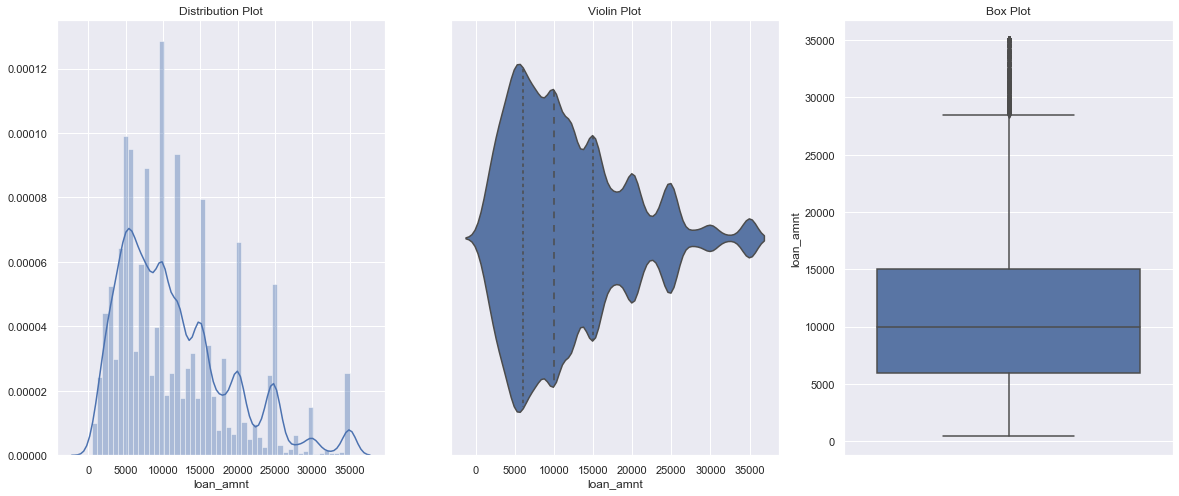

In [112]:
univariate(df=df,col='loan_amnt',vartype=0)

2. Interest Rate

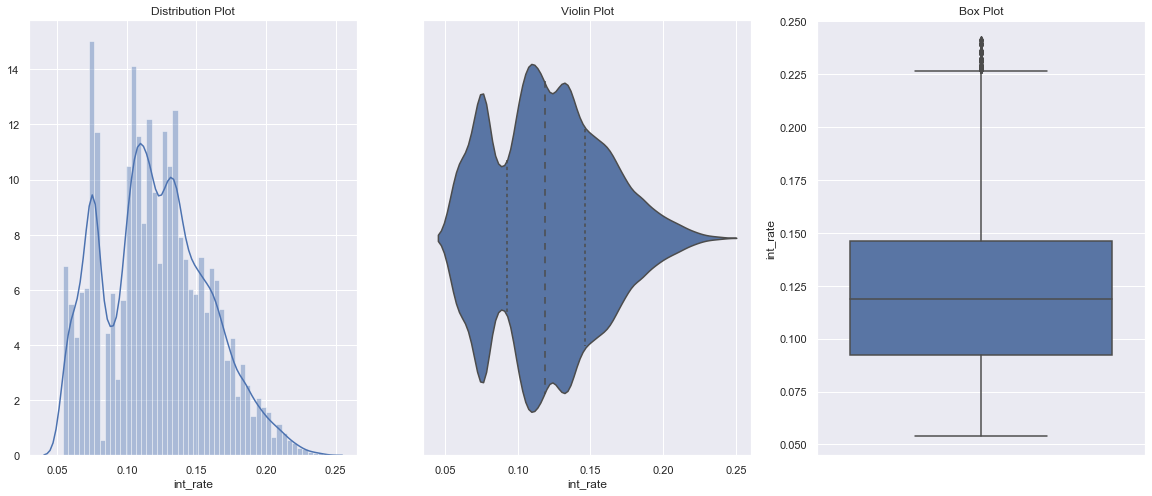

In [113]:
univariate(df=df,col='int_rate',vartype=0)

4. Annual Income

In [114]:
df["annual_inc"].describe()


count     35332.000000
mean      66947.131547
std       37313.140582
min        4000.000000
25%       41345.400000
50%       60000.000000
75%       82142.500000
max      294000.000000
Name: annual_inc, dtype: float64

In [115]:
6.000000e+06 / 6.959688e+04

86.21076117205253

Max value is 6.000000e+06 which is approx 80 times more than mean value, so we will remove the outliers from Annual Income.¶
Remove Outliers (values from 99 to 100%)

In [116]:
q = df["annual_inc"].quantile(0.995)
df = df[df["annual_inc"] < q]
df["annual_inc"].describe()

count     35152.000000
mean      65984.617656
std       34869.929679
min        4000.000000
25%       41000.000000
50%       59857.800000
75%       82000.000000
max      228000.000000
Name: annual_inc, dtype: float64

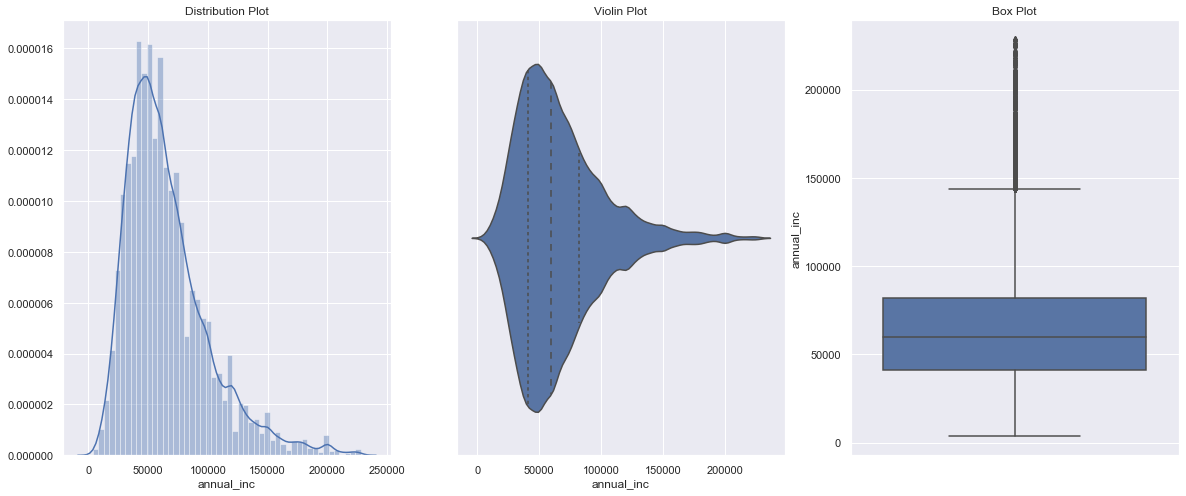

In [117]:
univariate(df=df,col='annual_inc',vartype=0)

# Categorical Variables

 Loan Status

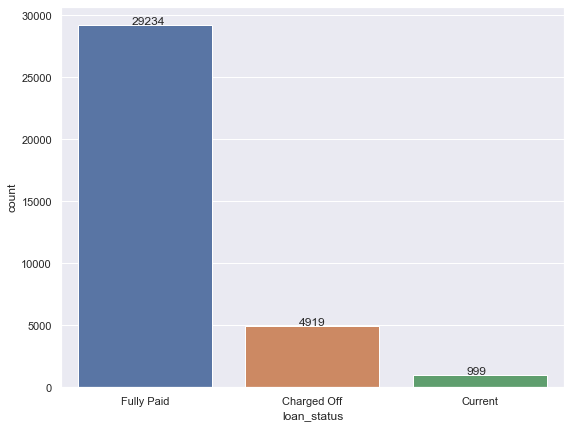

In [118]:
univariate(df=df,col='loan_status',vartype=1)

 Purpose of loan

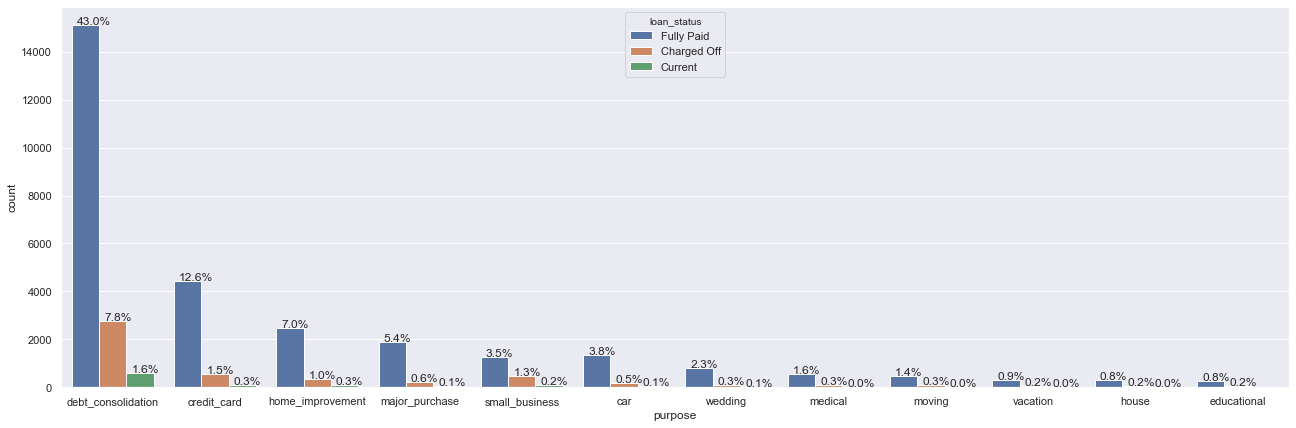

In [119]:
univariate(df=df,col='purpose',vartype=1,hue='loan_status')

Home Ownership wise Loan

In [120]:
df.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE'], dtype=object)

In [121]:
# Remove rows where home_ownership'=='OTHER', 'NONE'
rem = ['OTHER', 'NONE']
df.drop(df[df['home_ownership'].isin(rem)].index,inplace=True)
df.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE'], dtype=object)

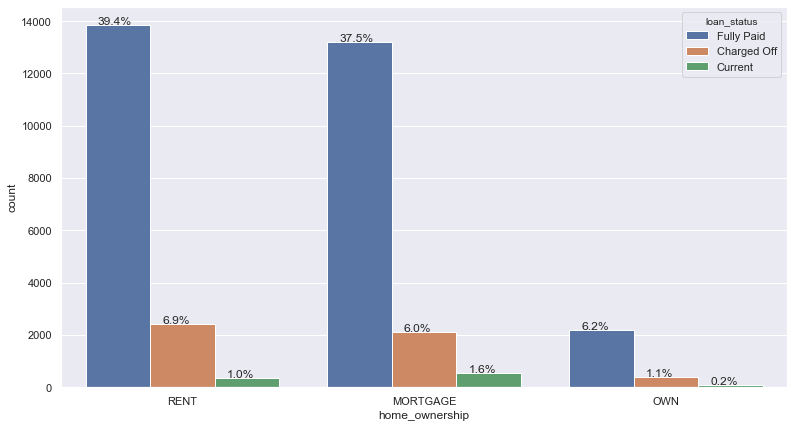

In [122]:
univariate(df=df,col='home_ownership',vartype=1,hue='loan_status')

Year wise Loan

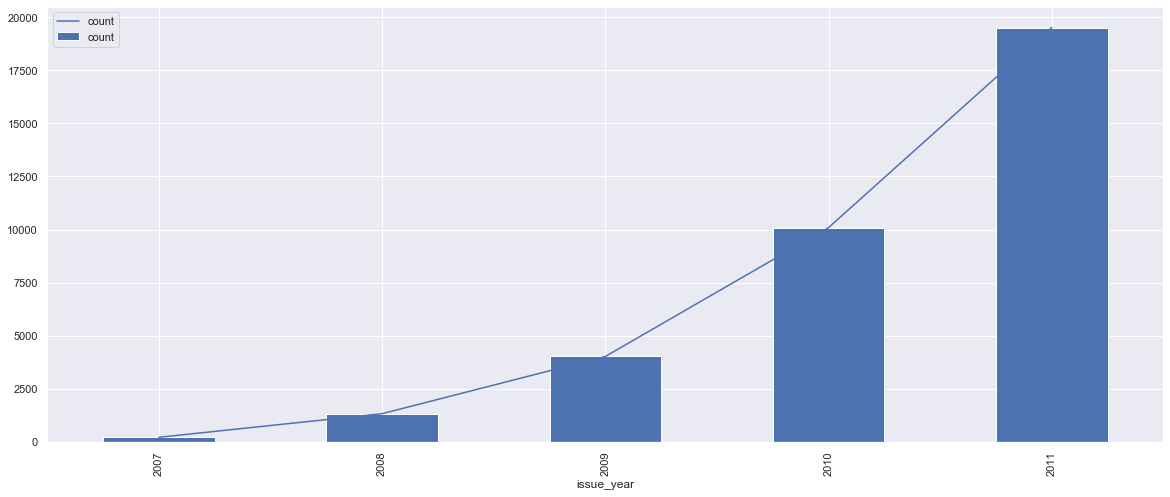

In [123]:
year_wise =df.groupby(by= [df.issue_year])[['loan_status']].count()
year_wise.rename(columns={"loan_status": "count"},inplace=True)
ax =year_wise.plot(figsize=(20,8))
year_wise.plot(kind='bar',figsize=(20,8),ax = ax)
plt.show()

 loan applicants are increasing year on year, approx 47% of loan applicants received loans in 2011.

Loan Term

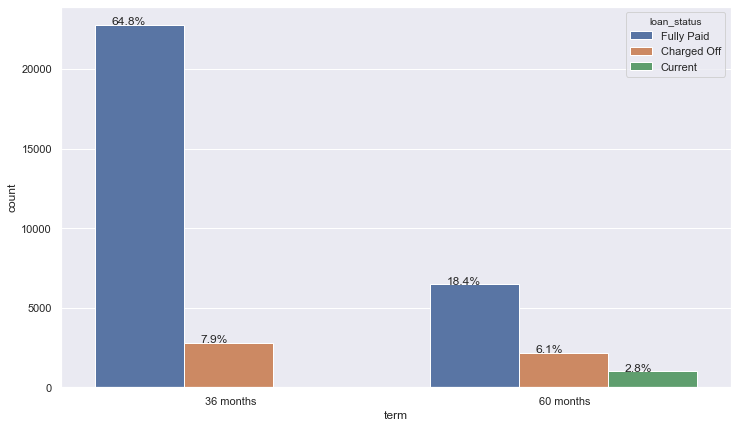

In [124]:
univariate(df=df,col='term',vartype=1,hue='loan_status')

70% of applicants applied loan for 36 months term period.

In [125]:
df.head(3)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,loan_income_ratio,issue_month,issue_year,loan_amnt_range,annual_inc_range,issue_date,int_rate_range
0,5000,5000,4975.0,36 months,0.1065,162.87,B,B2,NaN,10+ years,...,171.62,2016-05-01,0.0,0.208333,12,2011,0-5000,0-25000,01,0-7.5
1,2500,2500,2500.0,60 months,0.1527,59.83,C,C4,Ryder,< 1 year,...,119.66,2013-09-01,0.0,0.083333,12,2011,0-5000,25000-50000,01,0-7.5
2,2400,2400,2400.0,36 months,0.1596,84.33,C,C5,NaN,10+ years,...,649.91,2016-05-01,0.0,0.195886,12,2011,0-5000,0-25000,01,0-7.5


# Bivariate/Multivariate Analysis

Purpose of Loan vs Loan Amount for each Loan Status

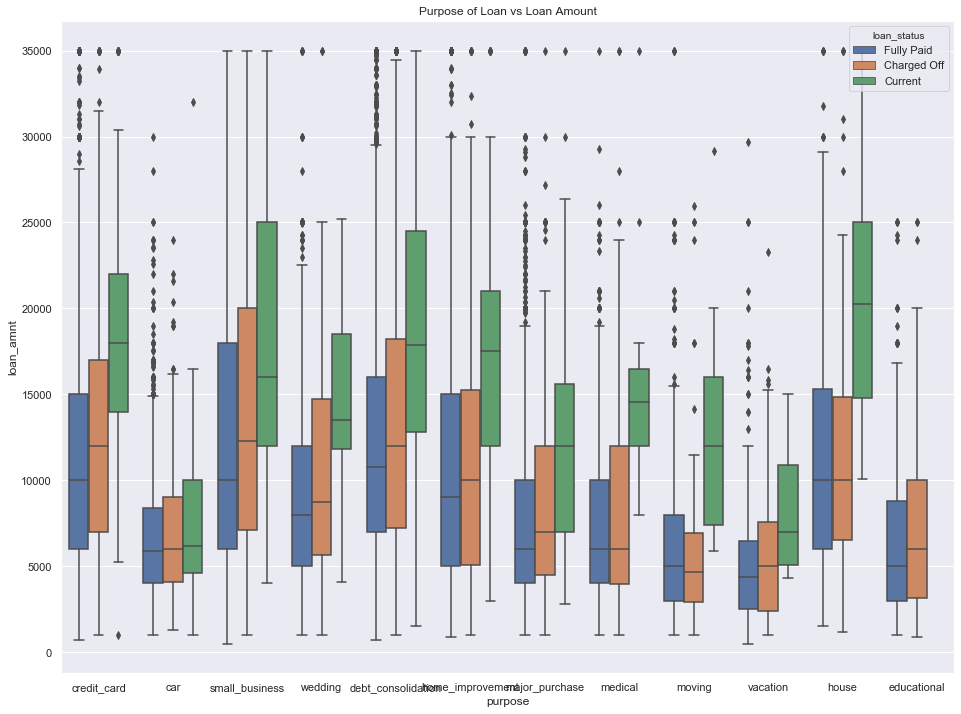

In [126]:
plt.figure(figsize=(16,12))
sns.boxplot(data =df, x='purpose', y='loan_amnt', hue ='loan_status')
plt.title('Purpose of Loan vs Loan Amount')
plt.show()

Correlation Matrix : All Continuos(Numeric) Variables

In [131]:
num_cols=["loan_amnt","funded_amnt","funded_amnt_inv","int_rate","installment","annual_inc","dti","loan_income_ratio"]


In [132]:
loan_correlation = df[num_cols].corr()
loan_correlation

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,loan_income_ratio
loan_amnt,1.000000,0.981029,0.939186,0.318090,0.926917,0.416580,0.080219,0.623993
funded_amnt,0.981029,1.000000,0.957880,0.322018,0.953794,0.411873,0.079932,0.611731
funded_amnt_inv,0.939186,0.957880,1.000000,0.315110,0.902049,0.394386,0.086404,0.582366
int_rate,0.318090,0.322018,0.315110,1.000000,0.290630,0.077745,0.115599,0.225747
installment,0.926917,0.953794,0.902049,0.290630,1.000000,0.415159,0.067333,0.559943
annual_inc,0.416580,0.411873,0.394386,0.077745,0.415159,1.000000,-0.115625,-0.317625
dti,0.080219,0.079932,0.086404,0.115599,0.067333,-0.115625,1.000000,0.151775
loan_income_ratio,0.623993,0.611731,0.582366,0.225747,0.559943,-0.317625,0.151775,1.000000


 HeatMap: All continuos variables

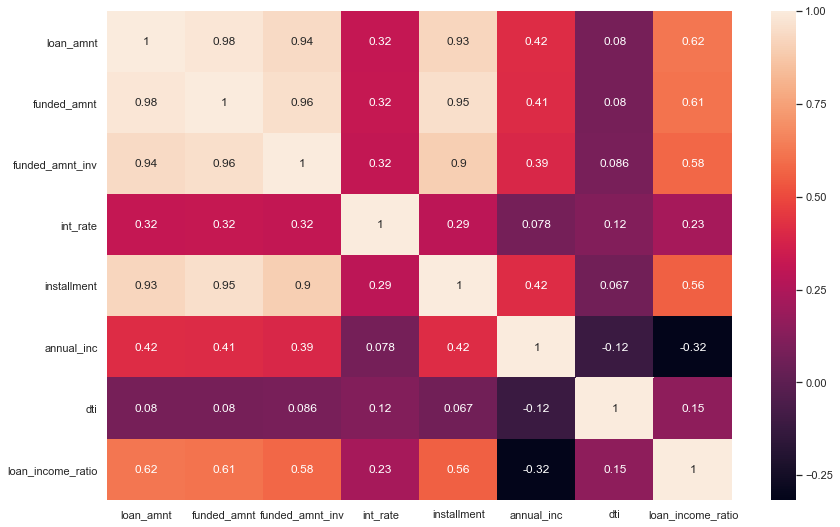

In [133]:
f, ax = plt.subplots(figsize=(14, 9))
sns.heatmap(loan_correlation, 
            xticklabels=loan_correlation.columns.values,
            yticklabels=loan_correlation.columns.values,annot= True)
plt.show()

It is clear from the Heatmap that how 'loan_amnt','funded_amnt' & 'funded_amnt_inv' are closely interrelated.So we can take any one column out of them for our analysis.

Employment Length vs Loan Amount for different pupose of Loan

In [134]:
loanstatus=df.pivot_table(index=['loan_status','purpose','emp_length'],values='loan_amnt',aggfunc=('count')).reset_index()
loanstatus=df.loc[df['loan_status']=='Charged Off']

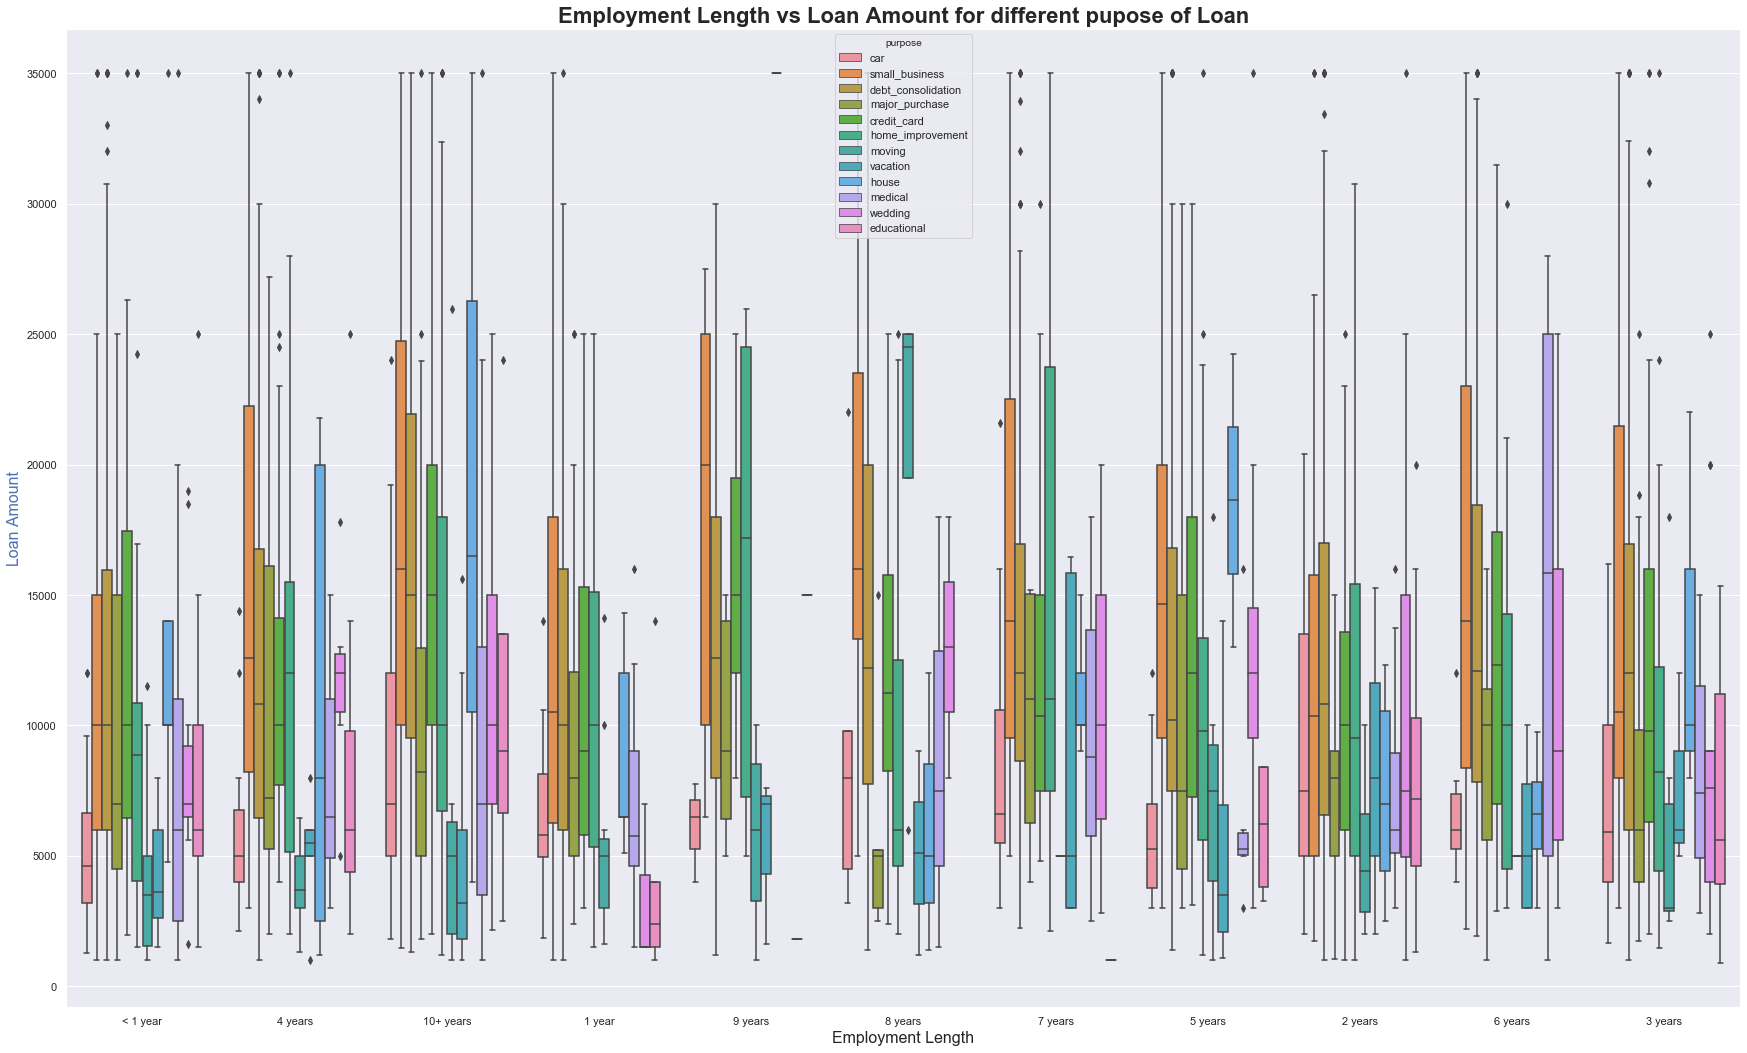

In [135]:
ax = plt.figure(figsize=(30, 18))
ax = sns.boxplot(x='emp_length',y='loan_amnt',hue='purpose',data=loanstatus)
ax.set_title('Employment Length vs Loan Amount for different pupose of Loan',fontsize=22,weight="bold")
ax.set_xlabel('Employment Length',fontsize=16)
ax.set_ylabel('Loan Amount',color = 'b',fontsize=16)
plt.show()

## Bivariate/Multivariate Analysis with Probability of Charge off


Categorical Variables vs Probability of Charged Off


Probability of ChargedOff = (Number of Applicants who charged off) / (Total No. of Applicants)

In [137]:
#'crosstab' function will be used to get the summarized table 
#for each column(passed as a variable) along with 
#probability of charge off w.r.t that column.


def crosstab(df,col):
    '''
    df : Dataframe
    col: Column Name
    '''
    crosstab = pd.crosstab(df[col], df['loan_status'],margins=True)
    crosstab['Probability_Charged Off'] = round((crosstab['Charged Off']/crosstab['All']),3)
    crosstab = crosstab[0:-1]
    return crosstab

In [138]:
#'bivariate_prob' function will be used to plot count of values for each column(passed as a variable) 
#stacked across 'loan_status' along with probability of charged off as a line chart.

# Probability of charge off
def bivariate_prob(df,col,stacked= True):
    '''
    df      : Dataframe
    col     : Column Name
    stacked : True(default) for Stacked Bar
    '''
    # get dataframe from crosstab function
    plotCrosstab = crosstab(df,col)
    
    linePlot = plotCrosstab[['Probability_Charged Off']]      
    barPlot =  plotCrosstab.iloc[:,0:2]
    ax = linePlot.plot(figsize=(20,8), marker='o',color = 'b')
    ax2 = barPlot.plot(kind='bar',ax = ax,rot=1,secondary_y=True,stacked=stacked)
    ax.set_title(df[col].name.title()+' vs Probability Charge Off',fontsize=20,weight="bold")
    ax.set_xlabel(df[col].name.title(),fontsize=14)
    ax.set_ylabel('Probability of Charged off',color = 'b',fontsize=14)
    ax2.set_ylabel('Number of Applicants',color = 'g',fontsize=14)
    plt.show()

Location vs Probability Charge Off

In [139]:
filter_states = df.addr_state.value_counts()
filter_states = filter_states[(filter_states < 10)]

loan_filter_states = df.drop(labels = df[df.addr_state.isin(filter_states.index)].index)

loan_status,Charged Off,Current,Fully Paid,All,Probability_Charged Off
addr_state,,,,,
NJ,253,53,1333,1639,0.154
NM,30,4,138,172,0.174
NV,90,15,329,434,0.207
NY,424,93,2778,3295,0.129
OH,138,40,926,1104,0.125
OK,35,11,217,263,0.133
OR,68,14,330,412,0.165
PA,156,49,1127,1332,0.117
RI,24,4,140,168,0.143


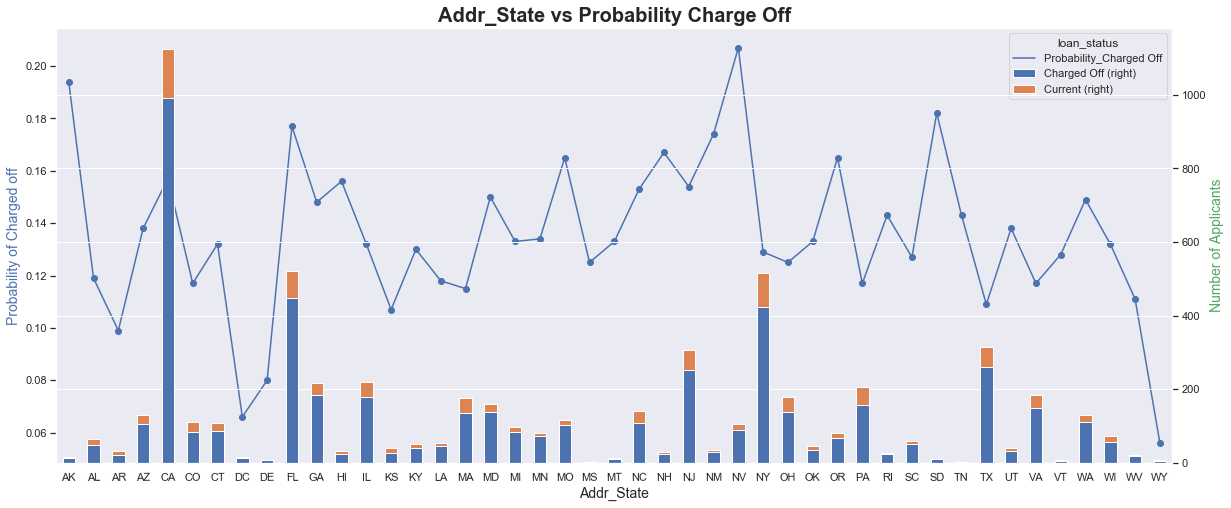

In [140]:
states = crosstab(loan_filter_states,'addr_state')
display(states.tail(20))

bivariate_prob(df =loan_filter_states,col ='addr_state')

Insights: There are multiple States/Provinces with high probability of charge,highest being 'NV' at 20%



Purpose of Loan vs Probability Charge Off

loan_status,Charged Off,Current,Fully Paid,All,Probability_Charged Off
purpose,,,,,
car,159,50,1330,1539,0.103
credit_card,534,102,4437,5073,0.105
debt_consolidation,2745,580,15124,18449,0.149
educational,55,0,265,320,0.172
home_improvement,337,97,2452,2886,0.117
house,58,14,297,369,0.157
major_purchase,220,37,1900,2157,0.102
medical,106,12,565,683,0.155
moving,90,7,479,576,0.156


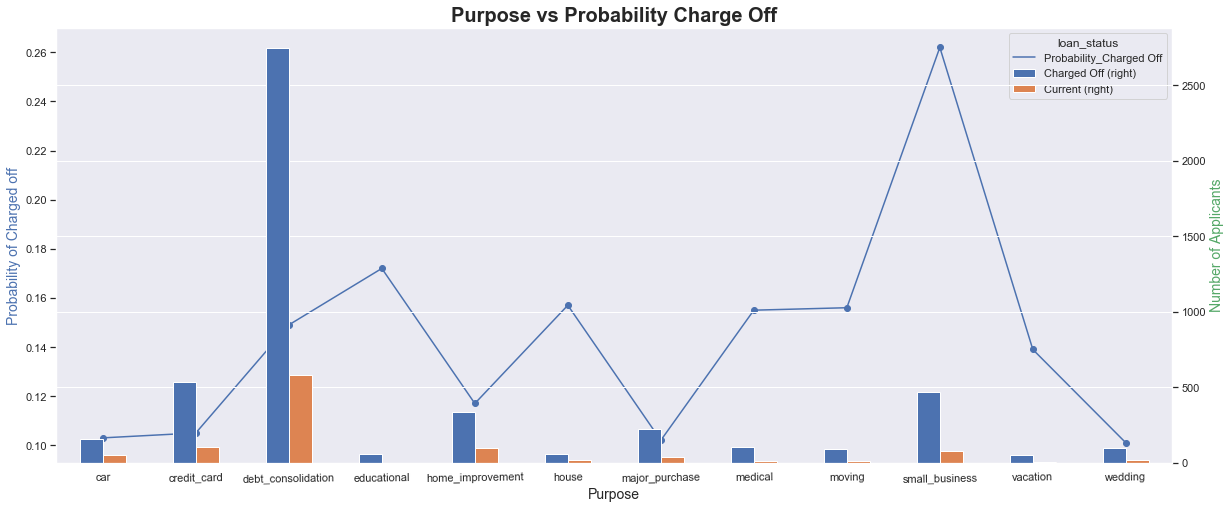

In [141]:
purpose = crosstab(df,'purpose')
display(purpose)
bivariate_prob(df =df,col ='purpose',stacked=False)

 Applicants who has taken the Loan for 'small business' has the highest probabilty of charge off of 26%. So bank should take extra caution like take some asset or guarentee while approving the loan for purpose of 'small business'

 Grade/Subgrade vs Probability Charge Off

loan_status,Charged Off,Current,Fully Paid,All,Probability_Charged Off
grade,,,,,
A,511,31,8335,8877,0.058
B,1241,302,9106,10649,0.117
C,1167,240,5729,7136,0.164
D,982,191,3541,4714,0.208
E,639,160,1757,2556,0.250
F,290,61,586,937,0.309
G,89,14,180,283,0.314


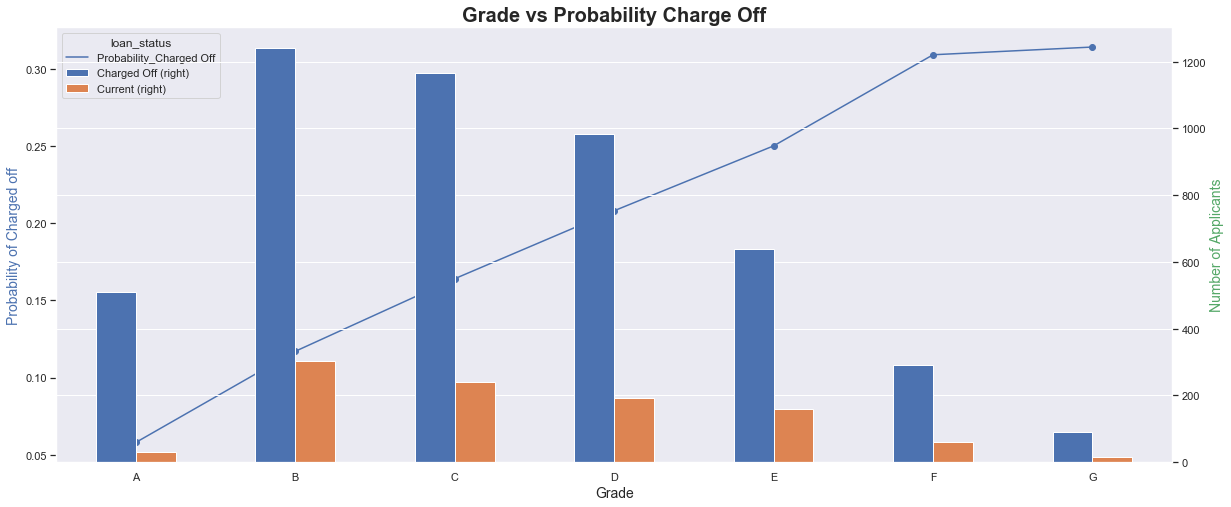

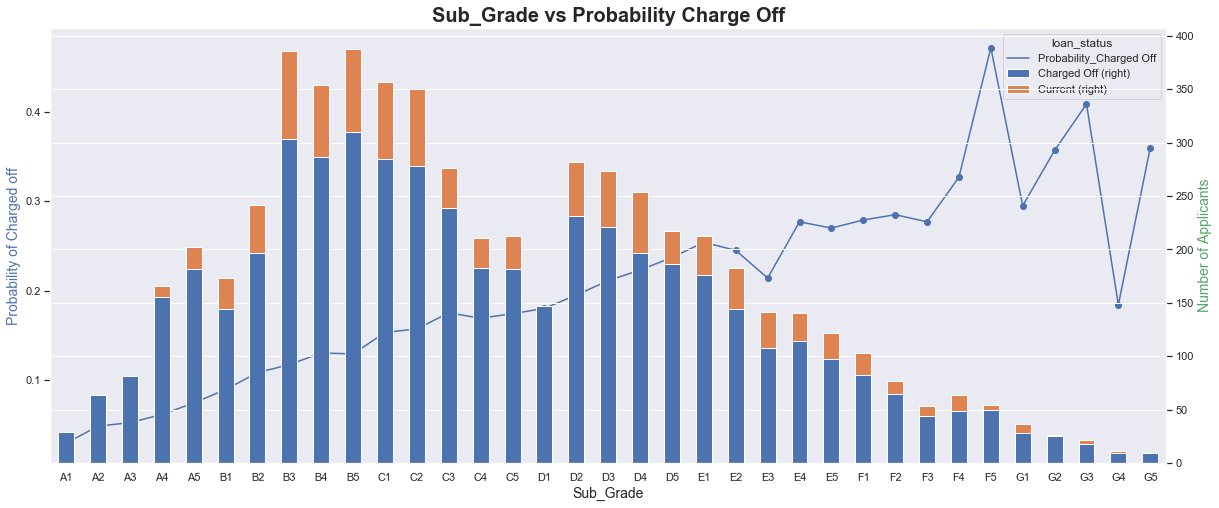

In [142]:
grade = crosstab(df,'grade')
display(grade)
bivariate_prob(df =df,col ='grade',stacked=False)
bivariate_prob(df =df,col ='sub_grade')

As we move from Grade A to G, probability that person will charged off is increasing.

 Annual Income Range vs Probability Charge Off

loan_status,Charged Off,Current,Fully Paid,All,Probability_Charged Off
annual_inc_range,,,,,
0-25000,386,19,1705,2110,0.183
25000-50000,1864,285,9531,11680,0.160
50000-75000,1523,326,9036,10885,0.140
75000-100000,669,198,4816,4794,0.140
100000 and above,477,171,4146,5683,0.084


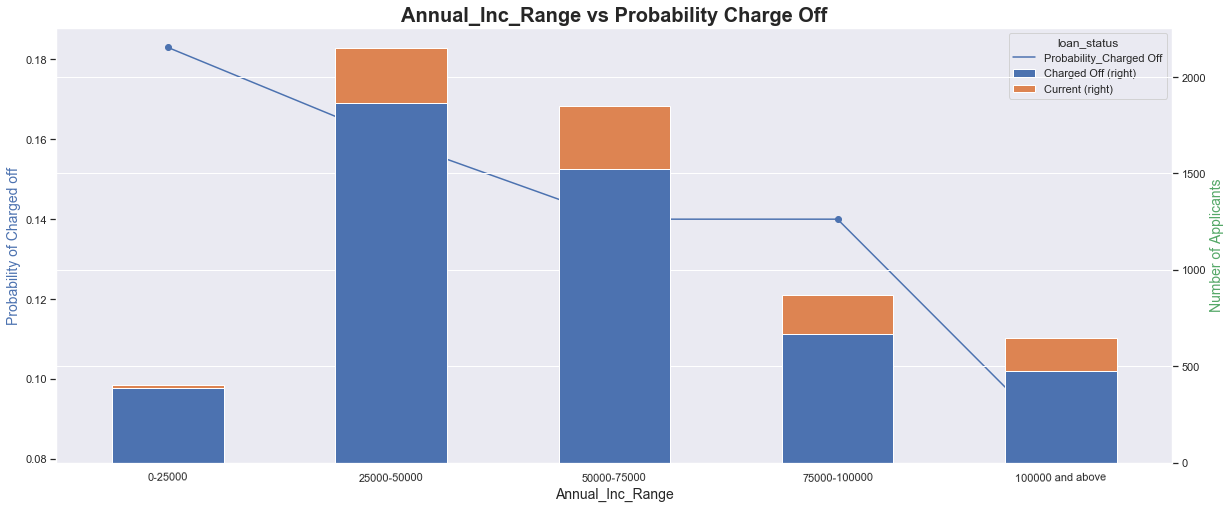

In [143]:
annual_inc_range = crosstab(df,'annual_inc_range')
display(annual_inc_range)
bivariate_prob(df =df,col ='annual_inc_range')

As the annual income is decreasing the probability that person will default is increasing with highest of 18% at (25000 to 50000) salary bracket.

Interest rate Range vs Probability Charge Off

loan_status,Charged Off,Current,Fully Paid,All,Probability_Charged Off
int_rate_range,,,,,
7.5-10,224,5,4563,8049,0.028
10-12.5,477,59,5623,6159,0.077
12.5-15,1085,237,7201,4792,0.226
15 and above,1284,230,6535,8523,0.151


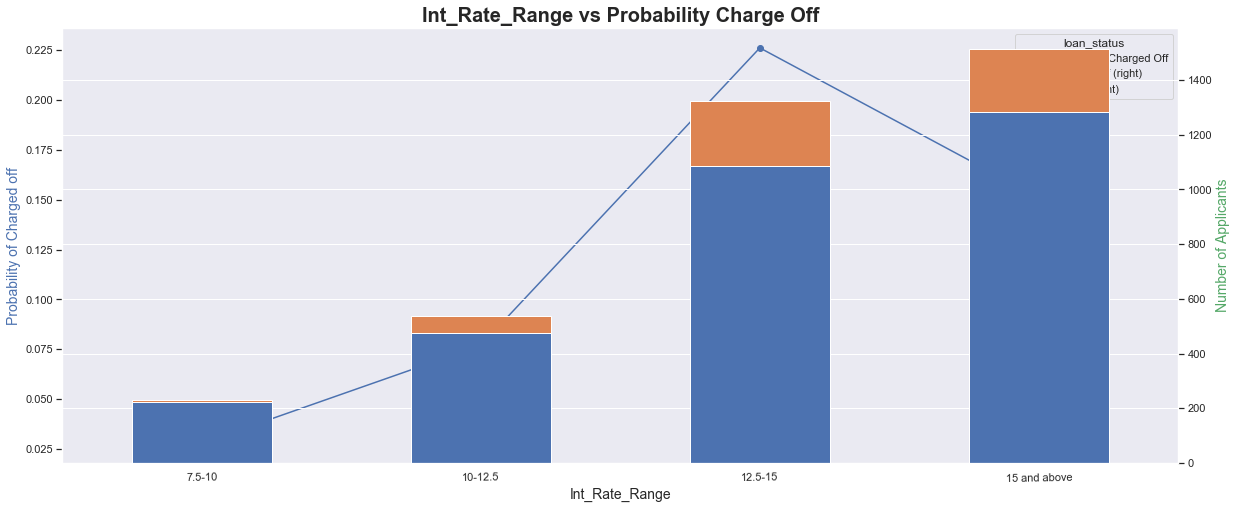

In [170]:
int_rate_range = crosstab(df,'int_rate_range')
display(int_rate_range)

bivariate_prob(df =df,col ='int_rate_range')

As the interest rate is increasing the probability that person will default is increasing with highest of 12.5% at 15% & above bracket.

Employment Length vs Probability Charge Off

loan_status,Charged Off,Current,Fully Paid,All,Probability_Charged Off
emp_length,,,,,
1 year,395,63,2371,2829,0.140
10+ years,1165,357,6329,7851,0.148
2 years,481,88,3308,3877,0.124
3 years,483,66,3098,3647,0.132
4 years,400,83,2589,3072,0.130
5 years,412,77,2446,2935,0.140
6 years,276,50,1684,2010,0.137
7 years,232,54,1292,1578,0.147
8 years,183,34,1102,1319,0.139


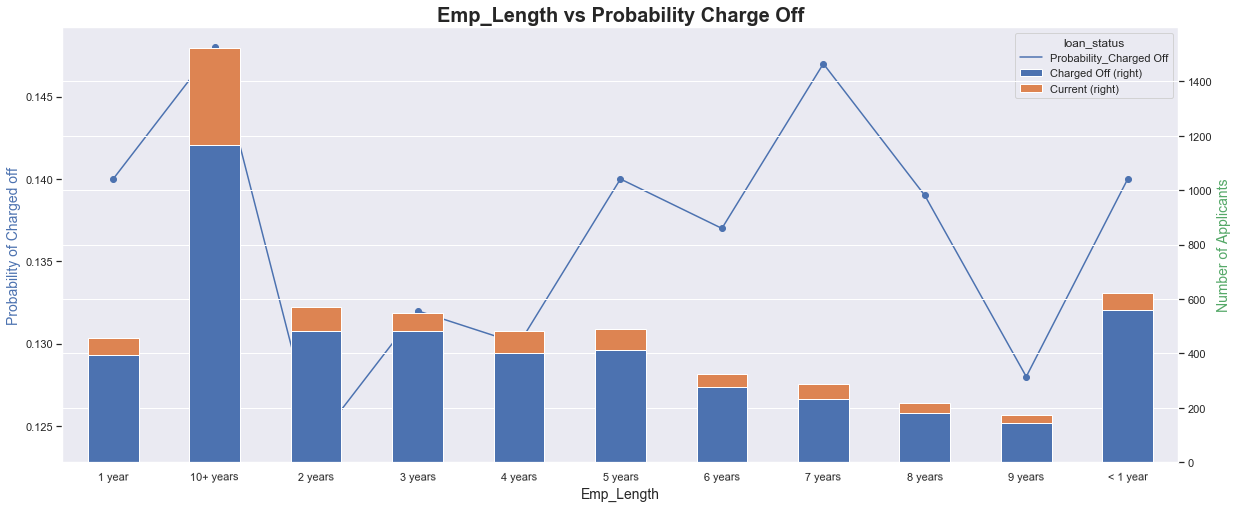

In [153]:
mp_length = crosstab(df,'emp_length')
display(mp_length)

bivariate_prob(df =df,col ='emp_length')


Applicants who are self employed & less than 1 year of experience are more probable of charged off..

# Details of Dependent and target variables from EDA

Target Variable
    1. Loan Status
Top-5 Major variables to consider for loan prediction:
    1. Purpose of Loan
    2. Employment Length
    3. Grade
    4. Interest Rate
    5. Term

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'title', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies', 'loan_income_ratio', 'issue_month',
       'issue_year', 'loan_amnt_range', 'annual_inc_range', 'issue_date',
       'int_rate_range'],
      dtype='object')

# Prediction

## using SVM

In [200]:
from sklearn.svm import SVC

In [210]:
model = SVC()

In [195]:
df['term'] = df1['term']


In [191]:
#df['term']=df['term'].apply(pd.to_numeric)

## preparing Data

In [208]:
x_1=df[['purpose','emp_length','grade','int_rate','term',]]
xx=pd.get_dummies(x_1)

xx.head()
y_1=df['loan_status']

In [209]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(xx,y_1, test_size=0.25, random_state=0)

In [211]:
model.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [212]:
model.predict(x_test[0:10])


array(['Fully Paid', 'Fully Paid', 'Fully Paid', 'Fully Paid',
       'Fully Paid', 'Fully Paid', 'Fully Paid', 'Fully Paid',
       'Fully Paid', 'Fully Paid'], dtype=object)

In [213]:
predictions = model.predict(x_test)


In [214]:
# Use score method to get accuracy of model
score = model.score(x_test, y_test)
print(score)

0.8326126536185707


# Model Accuracy is 83.2%